<a href="https://colab.research.google.com/github/marcinwolter/MachineLearning2020/blob/main/ICA_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Example of ICA in scikit learn**


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA

Define "time" as 2000 points in the range 0 to 8

In [ ]:
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)
print(time)

[0.000000e+00 4.002001e-03 8.004002e-03 ... 7.991996e+00 7.995998e+00
 8.000000e+00]


Three signals: sinus, sign and sawtooth

In [ ]:
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)
print(s1.shape)

(2000,)


Prepare data

In [ ]:
# Concatenate, out of three (2000,1) arrays build one (2000,3) array
S = np.c_[s1, s2, s3]
print(S.shape)
# Adding some noise
S += 0.6 * np.random.normal(size=S.shape)
# Normalize - divide by the standard deviation
S /= S.std(axis=0)

# A is an arbitrary mixing matrix. We should recover it using ICA
#A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
print("Mixing matrix: ")
print(A)

# Multiply S by the mixing matrix
X = np.dot(S, A)

(2000, 3)
Mixing matrix: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]


Perform ICA with 3 components

In [ ]:
ica = FastICA(n_components=3)
# recover the ICA predicted signals
S_ica = ica.fit_transform(X)

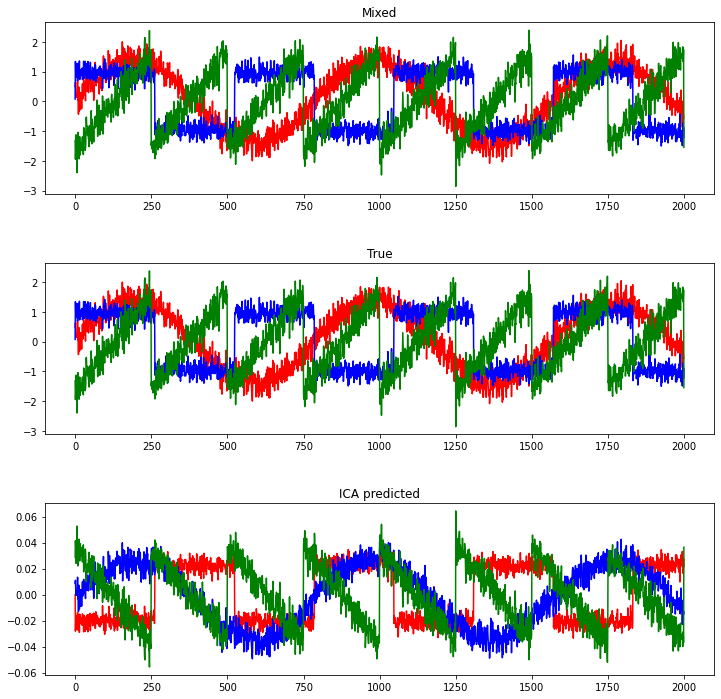

In [ ]:
plt.figure(figsize=(12,12))

models = [X, S, S_ica]

names = ["Mixed", "True", "ICA predicted"]

colors = ['red', 'blue', 'green']

for i, model in enumerate(models):
    plt.subplot(3, 1, i+1)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
    plt.title(names[i])

plt.subplots_adjust(hspace=0.4)       
plt.show()